In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [2]:
df = pd.read_csv(r"C:\Users\NandhaKishore\Desktop\Data_Science_project\DATA_SETS\naive_bayes_medical_dataset.csv")

print(df.head())
print(df.info())


   Age  BP_Level  Cholesterol  Glucose  Heart_Disease
0   67         2            0      101              0
1   24         2            1       72              0
2   45         2            1      163              1
3   74         2            1      123              1
4   23         0            1       99              0
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Age            12000 non-null  int64
 1   BP_Level       12000 non-null  int64
 2   Cholesterol    12000 non-null  int64
 3   Glucose        12000 non-null  int64
 4   Heart_Disease  12000 non-null  int64
dtypes: int64(5)
memory usage: 468.9 KB
None


In [3]:
df.isnull().sum()

Age              0
BP_Level         0
Cholesterol      0
Glucose          0
Heart_Disease    0
dtype: int64

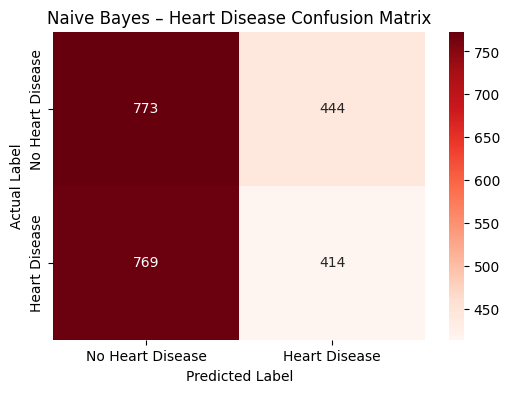

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,4))

sns.heatmap(
    cm,                      # ✅ confusion matrix data
    annot=True,
    fmt='d',
    cmap='Reds',
    xticklabels=['No Heart Disease', 'Heart Disease'],
    yticklabels=['No Heart Disease', 'Heart Disease']
)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Naive Bayes – Heart Disease Confusion Matrix')
plt.show()


In [5]:
X = df.drop('Heart_Disease', axis=1)
y = df['Heart_Disease']


In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [7]:
model = GaussianNB()
model.fit(X_train, y_train)


,"priors priors: array-like of shape (n_classes,), default=NonePrior probabilities of the classes. If specified, the priors are notadjusted according to the data.",None
,"var_smoothing var_smoothing: float, default=1e-9Portion of the largest variance of all features that is added tovariances for calculation stability... versionadded:: 0.20",1e-09


In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], shape=(2400,))

In [9]:
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", report)


Accuracy: 0.4945833333333333

Confusion Matrix:
 [[773 444]
 [769 414]]

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.64      0.56      1217
           1       0.48      0.35      0.41      1183

    accuracy                           0.49      2400
   macro avg       0.49      0.49      0.48      2400
weighted avg       0.49      0.49      0.48      2400



In [10]:
joblib.dump(model, 'heart_disease_nb.pkl')
print("Model saved successfully")


Model saved successfully
